### Import libs

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

### Plot road

In [2]:
def plot_graph(G, title, coords=True):
    '''Plot the graph'''
    plt.figure(figsize=(5,5))
    pos = dict((n, n) for n in G.nodes())
    nx.draw_networkx(G, pos=pos, with_labels=coords, node_size=30)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Load road

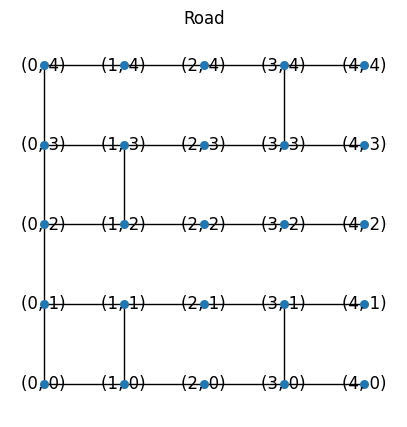

In [3]:
road = pickle.load(open('data/road.pickle', 'rb'))
plot_graph(road, 'Road')

### Agent

In [4]:
from typing import Tuple, List

class Agent:
    def __init__(self, graph, start: Tuple[int, int], end: Tuple[int, int]):
        self.graph = graph
        self.start = start
        self.end = end
        self.current = start
        self.visited = (start,)
        self.path = [start]
        
    def get_next(self) -> List[Tuple[int, int]]:
        return tuple(self.graph[self.current])
    
    def heuristic(self, node: Tuple[int, int]) -> int:
        return abs(node[0] - self.end[0]) + abs(node[1] - self.end[1])
    
    def get_best(self) -> Tuple[int, int]:
        best = None
        for node in self.get_next():
            if node not in self.visited:
                if best is None or self.heuristic(node) < self.heuristic(best):
                    best = node
                     
        ## if no best found, go back
        if best is None:
            self.path.pop()
            self.current = self.path[-1]
            
        return best
           
    
    def move(self, new: Tuple[int, int]):
        self.current = new
        self.visited += (new,)
        self.path.append(new)
        
        print(*self.path, sep=' -> ')

### Plot path

In [5]:
def plot_path(G, agent, title, coords=True):
    '''Plot the graph with path'''
    plt.figure(figsize=(5,5))
    pos = dict((n, n) for n in G.nodes())
    nx.draw_networkx(G, pos=pos, with_labels=coords, node_size=30)
    nx.draw_networkx_nodes(G, pos=pos, 
                           nodelist=agent.visited, 
                           node_color='r', 
                           node_size=30)
    
    nx.draw_networkx_nodes(G, pos=pos, 
                           nodelist=agent.path, 
                           node_color='g', 
                           node_size=30)
    
    nx.draw_networkx_edges(G, pos=pos, 
                           edgelist=[(agent.path[i], agent.path[i+1]) for i in range(len(agent.path)-1)], 
                           edge_color='g', width=2)
    plt.title(title)
    plt.axis('off')
    plt.show()

(0, 0) -> (1, 0)
(0, 0) -> (1, 0) -> (2, 0)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (4, 0)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (4, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2) -> (2, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2) -> (2, 2) -> (3, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (3, 1) -> (2, 1) -> (1, 1) -> (0, 1) -> (0, 2) -> (1, 2) -> (2, 2) -> (3, 2) -> (4, 2)
(0, 0) -> (1, 0) -> (2, 0) -> (3

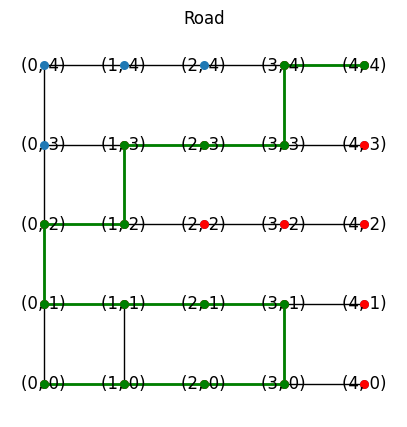

In [6]:
car = Agent(road, (0, 0), (4, 4))
while car.current != car.end:
    best = car.get_best()
    if best is not None:
        car.move(best)
        
plot_path(road, car, 'Road')


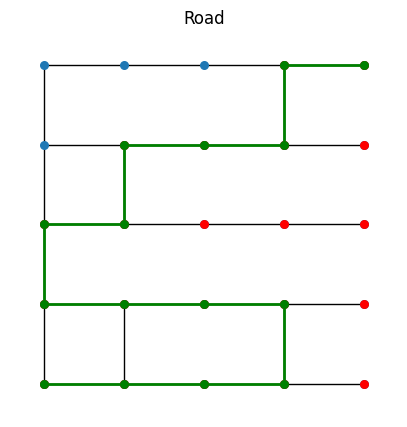

In [7]:
plot_path(road, car, 'Road', coords=False)